In [167]:
# https://www.rdkit.org/
#https://github.com/rdkit/rdkit
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

# https://pandas.pydata.org
import pandas as pd

# https://numpy.org/doc/stable/release.html
import numpy as np

#https://github.com/mordred-descriptor/mordred
from mordred import Calculator, descriptors

from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D

In [144]:
m1 = Chem.MolFromSmiles('c1ccN(COO)Cc1')
#m1 = Chem.MolFromSmiles('Cc1ccccc1')

# SMILE to Image

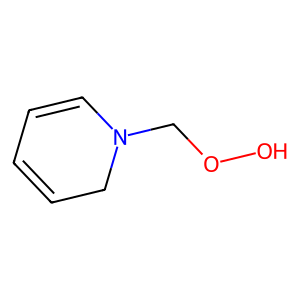

In [145]:
img = Draw.MolToImage(m1)
img

# Count Atom [ 9H,  6C]

In [146]:
print("NO H",m1.GetNumAtoms())

m1_2 = Chem.AddHs(m1)
print("   H",m1_2.GetNumAtoms())

NO H 9
   H 18


In [190]:
list1 = list()
for atom in m1.GetAtoms():
  print(atom.GetAtomicNum(), atom.GetSymbol())
  list1.append(atom.GetAtomicNum())

list2 = list()
for bonds in m1.GetBonds():
  print(bonds.GetBondType())
  list2.append(bonds.GetBondType())
#m2.GetAtomWithIdx(0).GetSymbol()

6 C
6 C
6 C
7 N
6 C
8 O
8 O
6 C
6 C
SINGLE
DOUBLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
DOUBLE


In [192]:
set(list1)

{6, 7, 8}

In [193]:
set(list2)

{rdkit.Chem.rdchem.BondType.SINGLE, rdkit.Chem.rdchem.BondType.DOUBLE}

# Search Structure [ Ring, Functional Group]

True :  1 ring


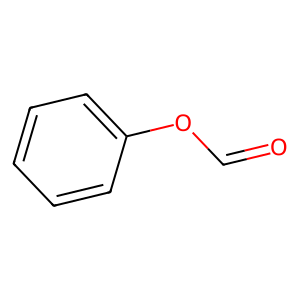

In [165]:
m2 = Chem.MolFromSmiles('C1=CC=CC=C1OC=O')
img = Draw.MolToImage(m2)
ri = m2.GetRingInfo()
print(m2.GetBondWithIdx(4).GetIsAromatic(),": ", ri.NumAtomRings(0), 'ring')
img

In [150]:
m2.HasSubstructMatch(Chem.MolFromSmarts('CO'))

True

# Finger print

In [151]:
from rdkit import DataStructs
ms = [Chem.MolFromSmiles('CCOC'), Chem.MolFromSmiles('CCO'),
Chem.MolFromSmiles('COC')]
fpgen = AllChem.GetRDKitFPGenerator()
fps = [fpgen.GetFingerprint(x) for x in ms]
DataStructs.TanimotoSimilarity(fps[0],fps[1])

AttributeError: module 'rdkit.Chem.AllChem' has no attribute 'GetRDKitFPGenerator'

In [ ]:
AllChem.GetMorganFingerprint(ms[0])

# Chemical Features

In [ ]:
from rdkit import Chem
from rdkit.Chem import ChemicalFeatures
from rdkit import RDConfig
import os
fdefName = os.path.join(RDConfig.RDDataDir,'BaseFeatures.fdef')
factory = ChemicalFeatures.BuildFeatureFactory(fdefName)

In [ ]:
m = Chem.MolFromSmiles('OCc1ccccc1CN')
#m = Chem.MolFromSmiles('Cc1ccccc1')
feats = factory.GetFeaturesForMol(m)
for feat in feats:
    print(feat.GetFamily()," ", feat.GetType()," ",feat.GetAtomIds())

# 2D 

NO H 7
   H 13
CO : False
OH : True


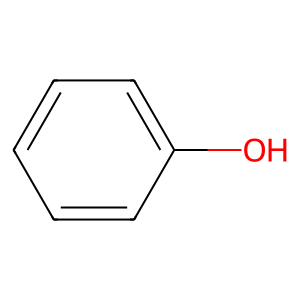

In [195]:
m = Chem.MolFromSmiles('c1ccccc1O')

##
d = rdMolDraw2D.MolDraw2DCairo(250, 200) # or MolDraw2DSVG to get SVGs
#m.GetAtomWithIdx(2).SetProp('atomNote', 'foo')
#m.GetBondWithIdx(0).SetProp('bondNote', 'bar')
d.drawOptions().addStereoAnnotation = True
d.drawOptions().addAtomIndices = True
d.DrawMolecule(m)
d.FinishDrawing()
d.WriteDrawingText('atom_annotation_1.png')

##
print("NO H",m.GetNumAtoms())
m_2 = Chem.AddHs(m)
print("   H",m_2.GetNumAtoms())

#
print("CO :",m.HasSubstructMatch(Chem.MolFromSmarts('CO')))
#print("Aro-O :",m.HasSubstructMatch(Chem.MolFromSmarts('cO')))
print("OH :",m_2.HasSubstructMatch(Chem.MolFromSmarts('O')))

##
img = Draw.MolToImage(m)
img

In [196]:
list1 = list()
for atom in m.GetAtoms():
  print(atom.GetAtomicNum(), atom.GetSymbol())
  list1.append(atom.GetAtomicNum())

list2 = list()
for bonds in m.GetBonds():
  print(bonds.GetBondType())
  list2.append(bonds.GetBondType())
#m2.GetAtomWithIdx(0).GetSymbol()

6 C
6 C
6 C
6 C
6 C
6 C
8 O
AROMATIC
AROMATIC
AROMATIC
AROMATIC
AROMATIC
SINGLE
AROMATIC


In [207]:
atom = m.GetAtomWithIdx(0)
[x.GetAtomicNum() for x in atom.GetNeighbors()]
len(atom.GetNeighbors()[-1].GetBonds())

3

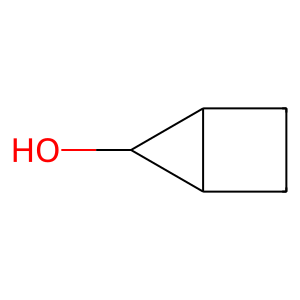

In [214]:
m = Chem.MolFromSmiles('OC1C2C1CC2')
img = Draw.MolToImage(m)
img

In [219]:
#print(m.GetAtomWithIdx(0).IsInRing()) #O

print(m.GetAtomWithIdx(1).IsInRing())
'''
m.GetAtomWithIdx(2).IsInRingSize(3)
m.GetAtomWithIdx(2).IsInRingSize(4)
m.GetAtomWithIdx(2).IsInRingSize(5)
m.GetBondWithIdx(1).IsInRingSize(3)
m.GetBondWithIdx(1).IsInRing()
'''

True


'\nm.GetAtomWithIdx(2).IsInRingSize(3)\nm.GetAtomWithIdx(2).IsInRingSize(4)\nm.GetAtomWithIdx(2).IsInRingSize(5)\nm.GetBondWithIdx(1).IsInRingSize(3)\nm.GetBondWithIdx(1).IsInRing()\n'

In [217]:
d = rdMolDraw2D.MolDraw2DCairo(250, 200) # or MolDraw2DSVG to get SVGs
#m.GetAtomWithIdx(2).SetProp('atomNote', 'foo')
#m.GetBondWithIdx(0).SetProp('bondNote', 'bar')
d.drawOptions().addStereoAnnotation = True
d.drawOptions().addAtomIndices = True
d.DrawMolecule(m)
d.FinishDrawing()
d.WriteDrawingText('atom_annotation_2.png')

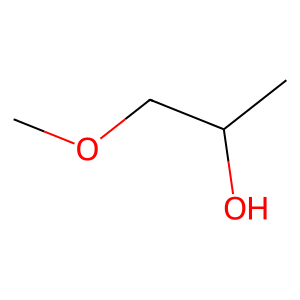

In [302]:
m1 = Chem.MolFromSmiles('CC(O)COC')
#m = Chem.AddHs(m)
img = Draw.MolToImage(m1)
#print(Descriptors.(m))
#Calculator.descriptors()
img

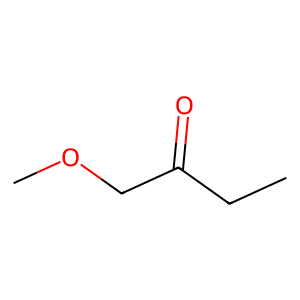

In [310]:
m2 = Chem.MolFromSmiles('COCC(=O)CC')
#m = Chem.AddHs(m)
img = Draw.MolToImage(m2)
#print(Descriptors.(m))
#Calculator.descriptors()
img

In [311]:
#Descriptors.setupAUTOCorrDescriptors()
df = pd.DataFrame()
data = {
  "SMILE": ["CC(O)COC","COCC(=O)CC"]
}
df=pd.DataFrame(data)
#m1==m2

In [312]:
def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles] 
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()
    
    Mol_descriptors =[]
    for mol in mols:
        # add hydrogens to molecules
        mol=Chem.AddHs(mol)
        # Calculate all 200 descriptors for each molecule
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors,desc_names 

# Function call
Mol_descriptors,desc_names = RDkit_descriptors(df['SMILE'])

In [313]:
df_with_200_descriptors = pd.DataFrame(Mol_descriptors,columns=desc_names)
df_with_200_descriptors

,AUTOCORR2D_1,AUTOCORR2D_2,AUTOCORR2D_3,AUTOCORR2D_4,AUTOCORR2D_5,AUTOCORR2D_6,AUTOCORR2D_7,AUTOCORR2D_8,AUTOCORR2D_9,AUTOCORR2D_10,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,2.062,2.127,1.921,1.444,0.666,0.081,0.000,0.0,2.042,2.182,...,0,0,0,0,0,0,0,0,0,0
1,2.179,2.238,2.190,1.786,1.143,0.436,0.062,0.0,2.172,2.304,...,0,0,0,0,0,0,0,0,0,0


In [314]:
#df_with_200_descriptors["SMILE"] = df["SMILES"]
df_with_200_descriptors.to_csv('output2.csv', index=False)